# CME + Flare Locations

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sunpy.map
import astropy.units as u
import sunpy.coordinates
from sunpy.coordinates import frames

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.time import Time

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

In [3]:
# Gathering the CME, Flare, and Sunspot properties
cme = df[['cme_time', 'cme_angle', 'cme_speed', 'cme_halo']]
fls = df[['flare_peak_time', 'flare_string_latlon', 'goes_flux']]
spts = df[['smart_observation_time', 'smart_string_latlon', 'smart_total_area', 'smart_total_flux']]

# Removing the rows containing any NaN values
cme = cme.dropna(how='any')
fls = fls.dropna(how='any')
spts = spts.dropna(how='any')

# Re-organising the indices
cme = cme.reset_index(drop=True)
fls = fls.reset_index(drop=True)
spts = spts.reset_index(drop=True)

# The coordinate systems
hg = df[['flare_hg_latitude', 'flare_hg_longitude']]
hg = hg.dropna(how='any')
hg = hg.reset_index(drop=True)

hc = df[['flare_hcx_position', 'flare_hcy_position']]
hc = hc.dropna(how='any')
hc = hc.reset_index(drop=True)

In [4]:
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 

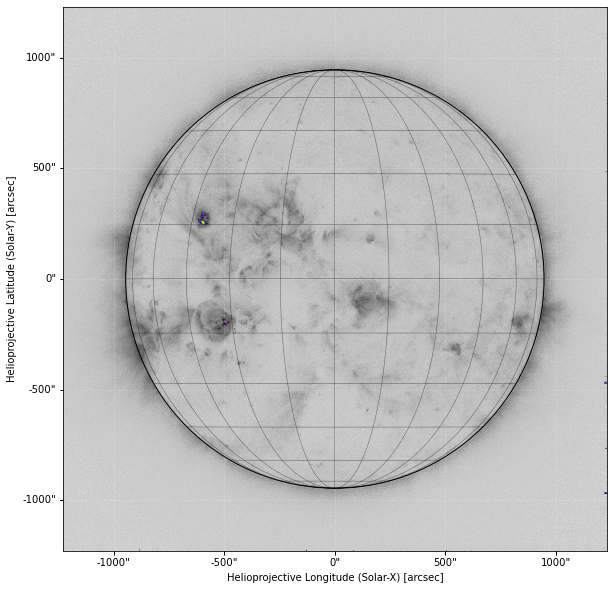

In [5]:
# Loading a sample map
sun = sunpy.map.Map(sample_map)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)
sun.plot(cmap='Greys')
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
sun.draw_contours(np.arange(30, 100, 5)*u.percent)

plt.show()

In [6]:
# Need to convert the latitudes and longitudes into the correct format
coords = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.Helioprojective)

In [7]:
coords

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    [( 216000.,  -14400.), ( 302400.,  -10800.), (  10800.,  -46800.), ...,
     (   3600.,   18000.), (-190800., -100800.), (-316800.,  -86400.)]>

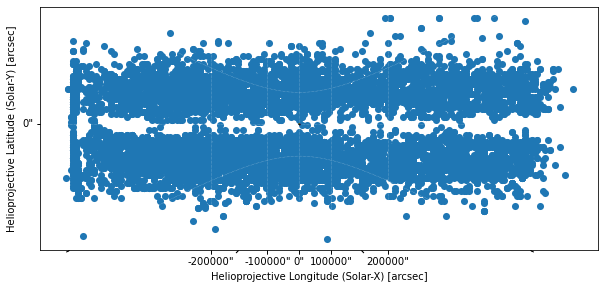

In [8]:
# Loading a sample map
sun = sunpy.map.Map(sample_map)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)
sun.plot(title='', cmap='Greys')
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
sun.draw_contours(np.arange(30, 100, 5)*u.percent)
plt.scatter(coords.Tx, coords.Ty, s=50, cmap='viridis', linewidth=0.0)

plt.show()

In [53]:
# The scale of my map is too small
cords = SkyCoord(hc.flare_hcx_position*u.arcsecond, hc.flare_hcy_position*u.arcsecond, frame=frames.Helioprojective)

In [10]:
print(max(cords.Tx))
print(min(cords.Tx))
print(max(cords.Ty))
print(min(cords.Ty))

1209.83arcsec
-1252.05arcsec
584.82arcsec
-614.3arcsec


In [11]:
print(max(hc.flare_hcx_position))
print(min(hc.flare_hcx_position))
print(max(hc.flare_hcy_position))
print(min(hc.flare_hcy_position))

1209.83
-1252.05
584.82
-614.3


In [38]:
import matplotlib.colors as colors

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\wcsaxes\core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


AttributeError: 'SkyCoord' object has no attribute 'Tx'

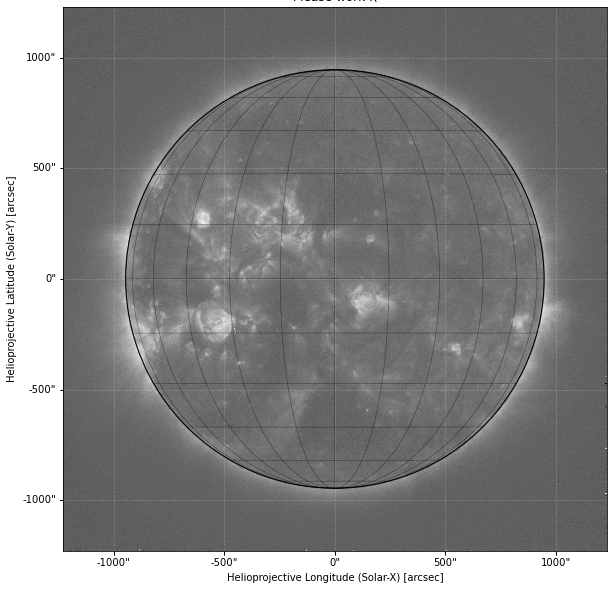

In [51]:
# SMH ---> had columns of the location arcsec equivalent the whole time..
sun = sunpy.map.Map(sample_map)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)

#sun.plot_settings['norm'] = colors.LogNorm(100, sun.max())

sun.plot(title='Please work :(', cmap='Greys_r')
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
sun.draw_contours(np.arange(30, 100, 5)*u.percent)

#sun.plot(ax)
plt.scatter(hc.flare_hcx_position, hc.flare_hcy_position, s=50, cmap='viridis', linewidth=0.0)
#plt.scatter(cords.Tx, cords.Ty, s=50, cmap='viridis', linewidth=0.0)
#ax.plot_coord(cords, 'o')
ax.set_autoscale_on(False)
#plt.subplots_adjust(top=0.95,bottom=0.0)

plt.show()

C:\Users\Peter\anaconda3\lib\site-packages\sunpy\map\mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\stretch.py:415: RuntimeWarning: invalid value encountered in true_divide
  self.data = (self.data - vmin) / (vmax - vmin)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2014-06-06 00:00:01
Exposure Time,2.902057 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.4 2.4] arcsec / pix
Reference Pixel,[511.5 511.5] pix

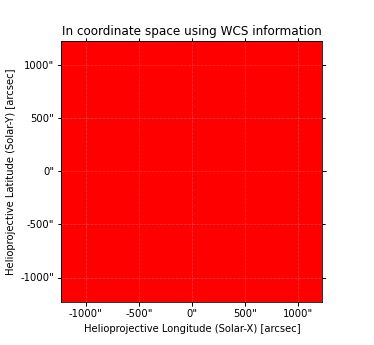
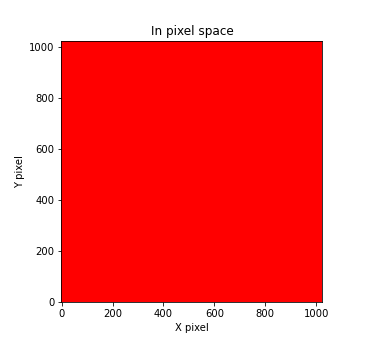
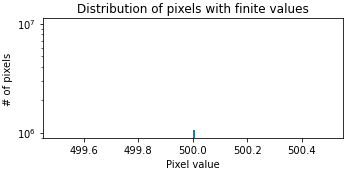

In [15]:
sun

In [28]:
jb0 = sun.heliographic_latitude.value * u.arcsecond

In [29]:
jb0

<Quantity -0.094685 arcsec>

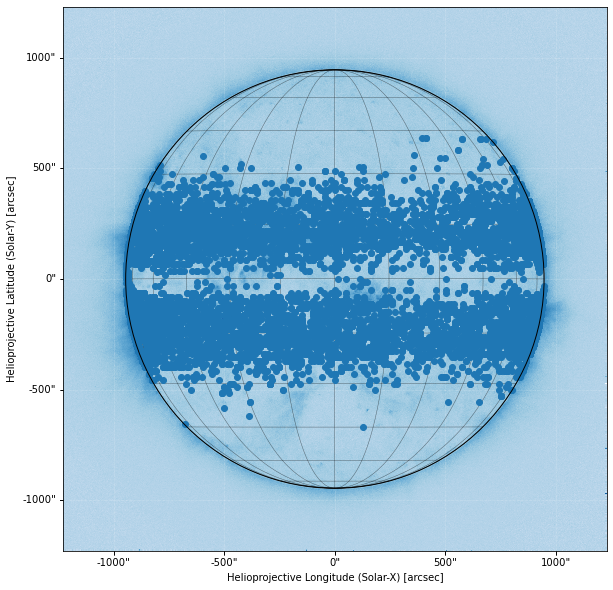

In [71]:
# WTF
sun = sunpy.map.Map(sample_map)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Blues')
#sun.plot(vmin=-120, vmax=120)
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
ax.set_autoscale_on(False)

if len(hg.flare_hg_longitude) > 0:
    c = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.HeliographicStonyhurst)
    ax.plot_coord(c, 'o')

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\wcsaxes\core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


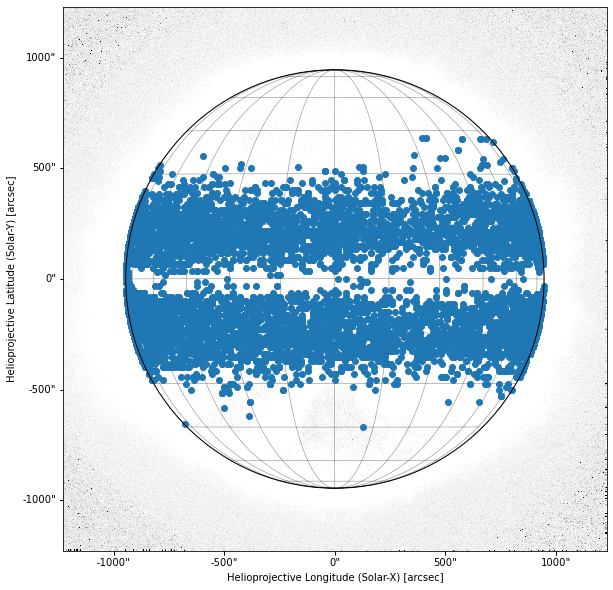

In [70]:
# WTF
sun = sunpy.map.Map(sample_map)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Greys_r', vmin=-1, vmax=1)
#sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)

if len(hg.flare_hg_longitude) > 0:
    c = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.HeliographicStonyhurst)
    ax.plot_coord(c, 'o')